In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

import pywt

In [4]:
X_train = pd.read_csv("./X_train.csv")
y_train = pd.read_csv("./y_train.csv")

In [32]:
X_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [6]:
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [7]:
X_train_wo = X_train.drop(['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W'], axis = 1)

In [8]:
X_train_wo.head()

,row_id,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [ ]:
# from sklearn.model_selection import GroupKFold

# def group_kfold(train_df,y,folds):
#     """Generator that yields train and test indexes."""
#     folds = GroupKFold(n_splits=folds)
#     f_t = []
#     f_test = []
#     for train_idx, test_idx in folds.split(train_df, groups=y['group_id'].values):
#         f_t.append(train_idx)
#         f_test.append(test_idx)
        
#     return f_t,f_test

### Scalograms

Text(0, 0.5, 'Coefficients')

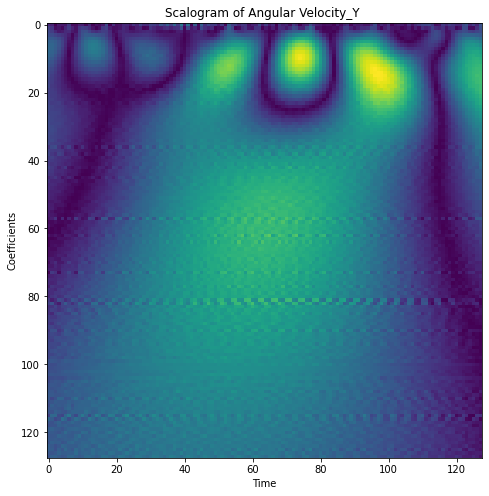

In [22]:
plt.figure(figsize = (8,8))
scales = np.arange(1,129)
coef , freq = pywt.cwt(np.array(X_train.angular_velocity_Y.values)[0:128], scales, wavelet='gaus1')
plt.imshow(abs(coef))
plt.title("Scalogram of Angular Velocity_Y ")
plt.xlabel("Time")
plt.ylabel("Coefficients")

In [26]:
abs(coef).shape

(100, 128)

Text(0, 0.5, 'Coefficients')

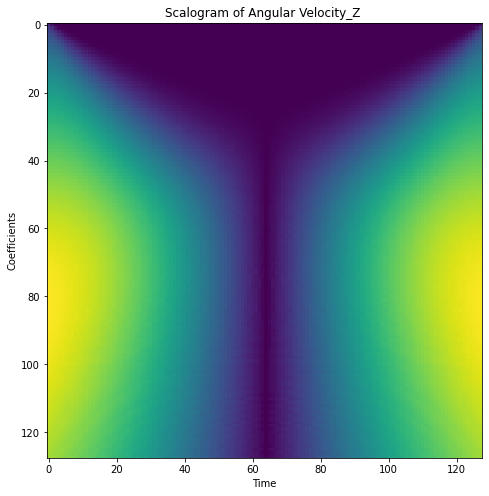

In [33]:
plt.figure(figsize = (8,8))
scales = np.arange(1,129)
coef , freq = pywt.cwt(np.array(X_train.orientation_X.values)[0:128], scales, wavelet='gaus1')
plt.imshow(abs(coef))
plt.title("Scalogram of Angular Velocity_Z ")
plt.xlabel("Time")
plt.ylabel("Coefficients")

Text(0, 0.5, 'Coefficients')

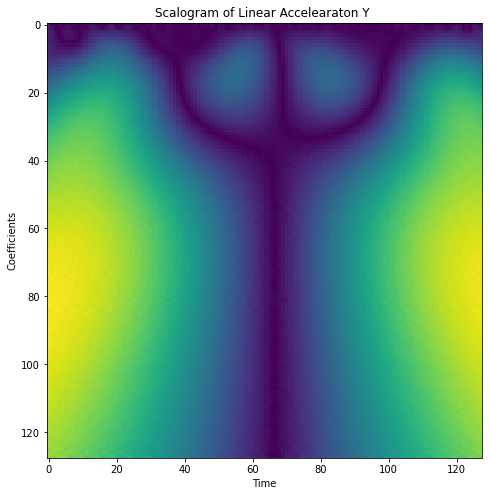

In [30]:
plt.figure(figsize = (8,8))
scales = np.arange(1,129)
coef , freq = pywt.cwt(np.array(X_train.linear_acceleration_Y.values)[0:128], scales, wavelet='gaus1')
plt.imshow(abs(coef))
plt.title("Scalogram of Linear Accelearaton Y ")
plt.xlabel("Time")
plt.ylabel("Coefficients")

In [13]:
from tqdm.auto import tqdm

In [14]:

scales = np.arange(1,129)
dataset = np.zeros((X_train_wo.shape[0]//128,6,128,128))
for i in tqdm(range(0,  X_train_wo.shape[0],128)):
    
    coef_x , freq = pywt.cwt(np.array(X_train.angular_velocity_X.values)[i:i+128], scales, wavelet='gaus1')
    coef_y , freq = pywt.cwt(np.array(X_train.angular_velocity_Y.values)[i:i+128], scales, wavelet='gaus1')
    coef_z , freq = pywt.cwt(np.array(X_train.angular_velocity_Z.values)[i:i+128], scales, wavelet='gaus1')
    coef_lx , freq = pywt.cwt(np.array(X_train.linear_acceleration_X.values)[i:i+128], scales, wavelet='gaus1')
    coef_ly , freq = pywt.cwt(np.array(X_train.linear_acceleration_Y.values)[i:i+128], scales, wavelet='gaus1')
    coef_lz , freq = pywt.cwt(np.array(X_train.linear_acceleration_Z.values)[i:i+128], scales, wavelet='gaus1')
    
    
    img = np.concatenate((abs(coef_x).reshape((128,128,1)),
                    abs(coef_y).reshape((128,128,1)), 
                    abs(coef_z).reshape((128,128,1)),
                    abs(coef_lx).reshape((128,128,1)),
                    abs(coef_ly).reshape((128,128,1)),
                    abs(coef_lz).reshape((128,128,1))),                   
                    axis = 2 )
    
    img = img.reshape(6,128,128)
    
    dataset[int(i//128)] = img
    
    

  0%|          | 0/3810 [00:00<?, ?it/s]

In [15]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [16]:
dataset_tensor = torch.from_numpy(dataset)

In [17]:
dataset_tensor.shape

torch.Size([3810, 6, 128, 128])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(y_train['surface'])
# target = torch.nn.functional.one_hot(torch.from_numpy(target))


In [19]:
target =torch.from_numpy(target)

In [20]:
le.classes_

array(['carpet', 'concrete', 'fine_concrete', 'hard_tiles',
       'hard_tiles_large_space', 'soft_pvc', 'soft_tiles', 'tiled',
       'wood'], dtype=object)

In [21]:
class WaveletDataset(Dataset):
    def __init__(self, data, y):
        self.images = data
        self.labels = y
        
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]

        return image, self.labels[idx]
    
    
        
        
        

In [22]:
wavelet_data = WaveletDataset(dataset_tensor, target)

In [23]:
for x, y in wavelet_data:
    print(x.shape)
    print(y)
    break

torch.Size([6, 128, 128])
tensor(2)


In [ ]:
# from torch.utils.data import random_split
# group_train_index, group_val_index = random_split(np.unique(y_train['group_id']), [73-20, 20])
# group_train_index, group_val_index = group_train_index.indices, group_val_index.indices


In [ ]:
# train_index = []
# for i in range(0, len(group_train_index)):
#     train_index.append(list(y_train[y_train['group_id'] == group_train_index[i]]['series_id'].values))
# train_index = [item for sublist in train_index for item in sublist]

# val_index = []
# for i in range(0, len(group_val_index)):
#     val_index.append(list(y_train[y_train['group_id'] == group_val_index[i]]['series_id'].values))
# val_index = [item for sublist in val_index for item in sublist]

In [ ]:
# from torch.utils.data import Subset
# train_ds=Subset(wavelet_data,train_index)
# val_ds=Subset(wavelet_data,val_index)

In [24]:
from torch.utils.data import random_split

len_histo = len(wavelet_data)
len_train = int(0.7 * len_histo)
len_val = len_histo - len_train

In [25]:
train_ds, val_ds = random_split(wavelet_data, [len_train, len_val])

In [26]:
print(f"Train Dataset Length: {len(train_ds)}")
print(f"Validation Dataset Length: {len(val_ds)}")

Train Dataset Length: 2667
Validation Dataset Length: 1143


In [27]:
#Data Loader

from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size = 256, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = 256, shuffle = False)

In [28]:
for x,y in train_dl:
    print(x.shape)
    print(y)
    break


torch.Size([256, 6, 128, 128])
tensor([7, 8, 5, 8, 2, 7, 5, 8, 5, 5, 0, 7, 1, 1, 8, 5, 8, 1, 8, 6, 4, 4, 6, 8,
        7, 2, 2, 6, 4, 2, 1, 5, 1, 7, 1, 5, 5, 6, 7, 1, 1, 1, 7, 5, 1, 5, 5, 1,
        8, 7, 5, 2, 6, 8, 1, 8, 1, 8, 8, 6, 4, 8, 1, 0, 2, 7, 2, 8, 6, 7, 6, 7,
        5, 8, 6, 5, 4, 4, 2, 2, 4, 1, 2, 1, 5, 1, 8, 1, 1, 1, 6, 7, 7, 2, 1, 7,
        5, 7, 7, 5, 7, 5, 8, 8, 1, 1, 0, 1, 2, 2, 7, 7, 1, 8, 4, 6, 5, 7, 7, 5,
        0, 4, 8, 2, 1, 6, 1, 7, 7, 1, 5, 2, 5, 7, 8, 4, 5, 5, 1, 2, 6, 8, 7, 8,
        8, 2, 5, 5, 4, 5, 1, 5, 1, 5, 6, 7, 2, 7, 5, 2, 8, 8, 6, 5, 1, 7, 2, 1,
        8, 8, 4, 1, 5, 5, 1, 5, 1, 4, 6, 6, 8, 7, 8, 5, 8, 5, 0, 8, 1, 2, 5, 1,
        7, 1, 0, 7, 1, 6, 2, 5, 7, 7, 0, 1, 2, 2, 1, 5, 4, 1, 8, 1, 1, 1, 6, 7,
        7, 5, 8, 8, 1, 2, 1, 8, 1, 0, 5, 1, 5, 2, 4, 2, 1, 7, 7, 8, 5, 4, 8, 1,
        1, 5, 6, 4, 5, 2, 4, 5, 6, 5, 0, 8, 0, 1, 5, 4])


In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [30]:
# Implementing a helper function to calculate the output size of a CNN layer.

def findConv2OutShape(H_in, W_in, conv, pool = 2):
    #get conv parameter
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding
    dilation = conv.dilation
    
    H_out=np.floor((H_in+2*padding[0]- dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    W_out=np.floor((W_in+2*padding[1]- dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)
    
    if pool:
        H_out/=pool
        W_out/=pool
        
    return int(H_out),int(W_out)
    

In [31]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
        C_in, H_in, W_in = params["input_shape"]
        init_f = params['initial_filters']
        num_fc1 = params["num_fc1"]
        num_fc2 = params["num_fc2"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]
        
        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size = 3)
        h,w = findConv2OutShape(H_in, W_in, self.conv1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w = findConv2OutShape(h, w, self.conv2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w = findConv2OutShape(h, w, self.conv3)
        
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w = findConv2OutShape(h, w, self.conv4)
        
        self.num_flatten = h*w*8*init_f
        
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_fc2)
        self.fc3 = nn.Linear(num_fc2,num_classes)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1, self.num_flatten)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, self.dropout_rate, training = self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, self.dropout_rate, training = self.training)
        x = self.fc3(x)
        
        return F.log_softmax(x, dim = 1)


In [32]:
params = {"input_shape": (6,128,128), 
         "initial_filters" : 8,
         "num_fc1": 1028,
          "num_fc2":100,
         "dropout_rate": 0.30,
         "num_classes": 10
         }

In [33]:
cnn_model = Net(params)

In [34]:
print(cnn_model)

Net(
  (conv1): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=1028, bias=True)
  (fc2): Linear(in_features=1028, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [35]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    cnn_model = cnn_model.to(device)
    cnn_model = cnn_model.float()
else:
    device = 'cpu'
    cnn_model = cnn_model.float()

In [36]:
# loss_func = nn.NLLLoss(reduction = 'sum')

from torch import optim
opt = optim.Adam(cnn_model.parameters(), lr = 3e-4)

In [37]:
def get_lr(opt):
    for A in opt.param_groups:
        return A['lr']
current_lr = get_lr(opt)

In [38]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5,
patience=20,verbose=1)

In [39]:
def metrics_batch(output, target):
    #get output class
    pred = output.argmax(dim = 1, keepdim = True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    
    return corrects


def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metrics_batch(output,target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [40]:
def loss_epoch(model, loss_func, dataset_dl, sanity_check = False, opt = None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in tqdm(dataset_dl):
        xb = xb.to(device).float()
        yb = yb.to(device)
        output = model(xb)
        loss_b, metric_b = loss_batch(loss_func,output, yb, opt)
        running_loss+=loss_b 
        running_metric+= metric_b
        
        if sanity_check is True:
            break
            
    loss = running_loss/float(len_data)
    metric = running_metric/float(len_data)
    
    return loss, metric
            
    

In [41]:
def train_val(model, param):
    num_epochs = param['num_epochs']
    loss_func = param["loss_func"]
    opt = param["optimizer"]
    train_dl = param["train_dl"]
    val_dl = param["val_dl"]
    sanity_check = param["sanity_check"]
    lr_scheduler = param["lr_scheduler"]
    path2weights = param['path2weights']
    loss_history = {
        "train": [],
        "val": []
    }
    
    metric_history = {
        "train": [],
        "val": []
    }
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f'Epochs{epoch+1}/{num_epochs}, current lr: {current_lr}')
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)
        
        model.eval()
        val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check, opt =None)
        
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("Saved new Weights")
            
        lr_scheduler.step()
        
        print("train loss: %.6f, train accuracy: %.6f, dev loss: %.6f, accuracy: %.2f"%(train_loss,train_metric*100, val_loss,100*val_metric))
        print("-"*10)
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history
        
    

In [42]:
from torch.optim.lr_scheduler import CosineAnnealingLR


In [43]:
import copy
import os

loss_func = nn.CrossEntropyLoss(reduction='sum')
# opt = optim.Adam(model_resnet.parameters(), lr = 1e-4)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)


os.makedirs("./models", exist_ok=True)
params_train={
"num_epochs": 500,
"optimizer": opt,
"loss_func": loss_func,
"train_dl": train_dl,
"val_dl": val_dl,
"sanity_check": False,
"lr_scheduler": lr_scheduler,
"path2weights": "./models/resnet18.pt",
}

In [44]:
model_trained, loss_hist, metric_hist = train_val(cnn_model, params_train)

Epochs1/500, current lr: 0.0003


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 2.126820, train accuracy: 17.135358, dev loss: 2.050794, accuracy: 19.42
----------
Epochs2/500, current lr: 0.0002714480406590546


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 2.075778, train accuracy: 19.572553, dev loss: 2.024171, accuracy: 26.95
----------
Epochs3/500, current lr: 0.00019669804065905458


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 2.064937, train accuracy: 18.935133, dev loss: 2.032992, accuracy: 19.42
----------
Epochs4/500, current lr: 0.00010430195934094532


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 2.055748, train accuracy: 21.484814, dev loss: 2.003326, accuracy: 19.42
----------
Epochs5/500, current lr: 2.955195934094536e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 2.042082, train accuracy: 19.722535, dev loss: 1.998779, accuracy: 25.11
----------
Epochs6/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 2.034100, train accuracy: 21.559805, dev loss: 1.998882, accuracy: 23.36
----------
Epochs7/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 2.037141, train accuracy: 22.009749, dev loss: 2.000352, accuracy: 19.42
----------
Epochs8/500, current lr: 0.00010430195934094538


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 2.032514, train accuracy: 22.309711, dev loss: 1.989266, accuracy: 19.77
----------
Epochs9/500, current lr: 0.0001966980406590547


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 2.016500, train accuracy: 23.134608, dev loss: 1.945414, accuracy: 32.55
----------
Epochs10/500, current lr: 0.00027144804065905477


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.991141, train accuracy: 26.434196, dev loss: 1.951212, accuracy: 26.16
----------
Epochs11/500, current lr: 0.00030000000000000014


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.974776, train accuracy: 25.271841, dev loss: 1.901573, accuracy: 30.45
----------
Epochs12/500, current lr: 0.0002714480406590549


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.944340, train accuracy: 27.821522, dev loss: 1.880191, accuracy: 30.80
----------
Epochs13/500, current lr: 0.00019669804065905474


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.910413, train accuracy: 27.859018, dev loss: 1.831196, accuracy: 32.98
----------
Epochs14/500, current lr: 0.00010430195934094543


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.879588, train accuracy: 28.383952, dev loss: 1.817495, accuracy: 32.98
----------
Epochs15/500, current lr: 2.9551959340945397e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.867529, train accuracy: 29.883765, dev loss: 1.813184, accuracy: 33.33
----------
Epochs16/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.863855, train accuracy: 31.271091, dev loss: 1.813275, accuracy: 33.16
----------
Epochs17/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.859827, train accuracy: 30.071241, dev loss: 1.806423, accuracy: 33.33
----------
Epochs18/500, current lr: 0.00010430195934094539


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.866341, train accuracy: 30.071241, dev loss: 1.808298, accuracy: 32.72
----------
Epochs19/500, current lr: 0.00019669804065905477


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.865822, train accuracy: 30.258718, dev loss: 1.806287, accuracy: 33.33
----------
Epochs20/500, current lr: 0.0002714480406590549


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.904710, train accuracy: 27.409074, dev loss: 1.807871, accuracy: 32.90
----------
Epochs21/500, current lr: 0.00030000000000000035


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.867666, train accuracy: 28.833896, dev loss: 1.809382, accuracy: 31.85
----------
Epochs22/500, current lr: 0.000271448040659055


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.839063, train accuracy: 29.133858, dev loss: 1.776050, accuracy: 33.07
----------
Epochs23/500, current lr: 0.0001966980406590552


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.829636, train accuracy: 32.133483, dev loss: 1.760463, accuracy: 35.87
----------
Epochs24/500, current lr: 0.00010430195934094555


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.797682, train accuracy: 32.620922, dev loss: 1.748404, accuracy: 35.08
----------
Epochs25/500, current lr: 2.955195934094544e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.799024, train accuracy: 32.695913, dev loss: 1.737649, accuracy: 37.27
----------
Epochs26/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.798723, train accuracy: 32.658418, dev loss: 1.737320, accuracy: 37.45
----------
Epochs27/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.801636, train accuracy: 31.833521, dev loss: 1.732621, accuracy: 36.22
----------
Epochs28/500, current lr: 0.00010430195934094542


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.788203, train accuracy: 32.883390, dev loss: 1.718965, accuracy: 36.48
----------
Epochs29/500, current lr: 0.00019669804065905485


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.802597, train accuracy: 31.908511, dev loss: 1.770696, accuracy: 35.26
----------
Epochs30/500, current lr: 0.00027144804065905504


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.791467, train accuracy: 32.883390, dev loss: 1.728842, accuracy: 35.96
----------
Epochs31/500, current lr: 0.0003000000000000005


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.818821, train accuracy: 31.983502, dev loss: 1.846079, accuracy: 30.88
----------
Epochs32/500, current lr: 0.0002714480406590552


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.801168, train accuracy: 31.758530, dev loss: 1.689188, accuracy: 40.51
----------
Epochs33/500, current lr: 0.00019669804065905507


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.751743, train accuracy: 34.383202, dev loss: 1.677539, accuracy: 40.68
----------
Epochs34/500, current lr: 0.00010430195934094565


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.753663, train accuracy: 34.383202, dev loss: 1.677942, accuracy: 42.34
----------
Epochs35/500, current lr: 2.955195934094549e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.735141, train accuracy: 35.958005, dev loss: 1.662922, accuracy: 41.12
----------
Epochs36/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.738003, train accuracy: 35.770529, dev loss: 1.663509, accuracy: 41.03
----------
Epochs37/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.735226, train accuracy: 35.883015, dev loss: 1.665996, accuracy: 41.21
----------
Epochs38/500, current lr: 0.00010430195934094545


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.735902, train accuracy: 36.482940, dev loss: 1.654072, accuracy: 41.64
----------
Epochs39/500, current lr: 0.00019669804065905493


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.735842, train accuracy: 34.758155, dev loss: 1.689219, accuracy: 39.90
----------
Epochs40/500, current lr: 0.0002714480406590552


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.718257, train accuracy: 35.883015, dev loss: 1.666745, accuracy: 40.68
----------
Epochs41/500, current lr: 0.00030000000000000073


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.717174, train accuracy: 36.182977, dev loss: 1.767804, accuracy: 34.73
----------
Epochs42/500, current lr: 0.0002714480406590557


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.735338, train accuracy: 35.658043, dev loss: 1.632415, accuracy: 42.96
----------
Epochs43/500, current lr: 0.00019669804065905523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.698777, train accuracy: 37.532808, dev loss: 1.630761, accuracy: 41.21
----------
Epochs44/500, current lr: 0.00010430195934094576


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.700092, train accuracy: 37.720285, dev loss: 1.705829, accuracy: 38.67
----------
Epochs45/500, current lr: 2.9551959340945837e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.698839, train accuracy: 37.832771, dev loss: 1.613180, accuracy: 42.17
----------
Epochs46/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.677015, train accuracy: 38.132733, dev loss: 1.609603, accuracy: 42.52
----------
Epochs47/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.678204, train accuracy: 38.020247, dev loss: 1.597796, accuracy: 43.13
----------
Epochs48/500, current lr: 0.00010430195934094605


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.666846, train accuracy: 38.845144, dev loss: 1.594340, accuracy: 44.88
----------
Epochs49/500, current lr: 0.00019669804065905515


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.702554, train accuracy: 36.070491, dev loss: 1.634542, accuracy: 43.04
----------
Epochs50/500, current lr: 0.0002714480406590552


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.674555, train accuracy: 38.545182, dev loss: 1.596031, accuracy: 46.19
----------
Epochs51/500, current lr: 0.00030000000000000106


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.664581, train accuracy: 38.245219, dev loss: 1.569594, accuracy: 44.36
----------
Epochs52/500, current lr: 0.000271448040659056


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.654912, train accuracy: 38.507687, dev loss: 1.597211, accuracy: 43.83
----------
Epochs53/500, current lr: 0.00019669804065905547


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.634596, train accuracy: 39.707537, dev loss: 1.680004, accuracy: 39.55
----------
Epochs54/500, current lr: 0.00010430195934094539


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.654086, train accuracy: 39.520060, dev loss: 1.552055, accuracy: 44.71
----------
Epochs55/500, current lr: 2.955195934094557e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.621551, train accuracy: 40.682415, dev loss: 1.565478, accuracy: 45.93
----------
Epochs56/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.619053, train accuracy: 42.032246, dev loss: 1.560738, accuracy: 46.11
----------
Epochs57/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.613410, train accuracy: 40.532433, dev loss: 1.568428, accuracy: 44.97
----------
Epochs58/500, current lr: 0.00010430195934094507


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.621909, train accuracy: 41.582302, dev loss: 1.532833, accuracy: 45.58
----------
Epochs59/500, current lr: 0.00019669804065905523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.620670, train accuracy: 40.944882, dev loss: 1.527997, accuracy: 46.46
----------
Epochs60/500, current lr: 0.0002714480406590553


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.613693, train accuracy: 40.607424, dev loss: 1.571308, accuracy: 44.36
----------
Epochs61/500, current lr: 0.0003000000000000013


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.617590, train accuracy: 40.607424, dev loss: 1.586012, accuracy: 44.44
----------
Epochs62/500, current lr: 0.0002714480406590556


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.600371, train accuracy: 41.132358, dev loss: 1.570787, accuracy: 41.38
----------
Epochs63/500, current lr: 0.00019669804065905566


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.595325, train accuracy: 41.357330, dev loss: 1.541760, accuracy: 45.32
----------
Epochs64/500, current lr: 0.00010430195934094551


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.576353, train accuracy: 43.607049, dev loss: 1.504022, accuracy: 48.21
----------
Epochs65/500, current lr: 2.955195934094563e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.560827, train accuracy: 43.832021, dev loss: 1.500986, accuracy: 47.68
----------
Epochs66/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.563061, train accuracy: 42.557180, dev loss: 1.499530, accuracy: 47.77
----------
Epochs67/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.570356, train accuracy: 43.532058, dev loss: 1.502627, accuracy: 47.51
----------
Epochs68/500, current lr: 0.00010430195934094509


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.570867, train accuracy: 42.594676, dev loss: 1.533937, accuracy: 45.84
----------
Epochs69/500, current lr: 0.00019669804065905528


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.568793, train accuracy: 43.982002, dev loss: 1.604160, accuracy: 42.69
----------
Epochs70/500, current lr: 0.000271448040659056


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.575871, train accuracy: 43.719535, dev loss: 1.519699, accuracy: 45.06
----------
Epochs71/500, current lr: 0.00030000000000000133


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.569811, train accuracy: 42.744657, dev loss: 1.519568, accuracy: 47.16
----------
Epochs72/500, current lr: 0.0002714480406590557


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.576470, train accuracy: 43.607049, dev loss: 1.480762, accuracy: 47.68
----------
Epochs73/500, current lr: 0.00019669804065905577


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.555984, train accuracy: 44.844394, dev loss: 1.480474, accuracy: 48.73
----------
Epochs74/500, current lr: 0.00010430195934094657


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.535480, train accuracy: 44.581927, dev loss: 1.473100, accuracy: 48.03
----------
Epochs75/500, current lr: 2.9551959340945648e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.524961, train accuracy: 44.956880, dev loss: 1.467959, accuracy: 48.82
----------
Epochs76/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.512058, train accuracy: 46.494188, dev loss: 1.468520, accuracy: 48.91
----------
Epochs77/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.514271, train accuracy: 45.781777, dev loss: 1.470333, accuracy: 48.91
----------
Epochs78/500, current lr: 0.00010430195934094616


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.534324, train accuracy: 44.844394, dev loss: 1.501165, accuracy: 45.76
----------
Epochs79/500, current lr: 0.00019669804065905547


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.528192, train accuracy: 45.181852, dev loss: 1.471877, accuracy: 47.94
----------
Epochs80/500, current lr: 0.00027144804065905634


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.553389, train accuracy: 44.131984, dev loss: 1.592020, accuracy: 42.61
----------
Epochs81/500, current lr: 0.00030000000000000176


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.587477, train accuracy: 42.369704, dev loss: 1.543243, accuracy: 44.88
----------
Epochs82/500, current lr: 0.0002714480406590567


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.567964, train accuracy: 42.932133, dev loss: 1.482100, accuracy: 48.99
----------
Epochs83/500, current lr: 0.00019669804065905707


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.530401, train accuracy: 44.731909, dev loss: 1.474834, accuracy: 48.21
----------
Epochs84/500, current lr: 0.00010430195934094573


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.502708, train accuracy: 45.556805, dev loss: 1.464675, accuracy: 48.73
----------
Epochs85/500, current lr: 2.9551959340945702e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.496267, train accuracy: 46.119235, dev loss: 1.443379, accuracy: 49.78
----------
Epochs86/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.493316, train accuracy: 46.981627, dev loss: 1.443627, accuracy: 49.52
----------
Epochs87/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.493551, train accuracy: 46.756655, dev loss: 1.446376, accuracy: 48.82
----------
Epochs88/500, current lr: 0.0001043019593409452


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.500164, train accuracy: 45.369329, dev loss: 1.458492, accuracy: 48.99
----------
Epochs89/500, current lr: 0.00019669804065905453


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.504445, train accuracy: 45.931759, dev loss: 1.445388, accuracy: 48.91
----------
Epochs90/500, current lr: 0.00027144804065905645


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.502763, train accuracy: 45.444319, dev loss: 1.529421, accuracy: 45.23
----------
Epochs91/500, current lr: 0.00030000000000000187


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.510919, train accuracy: 44.956880, dev loss: 1.452795, accuracy: 49.08
----------
Epochs92/500, current lr: 0.00027144804065905683


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.497124, train accuracy: 46.569179, dev loss: 1.462767, accuracy: 48.64
----------
Epochs93/500, current lr: 0.00019669804065905615


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.486331, train accuracy: 46.081740, dev loss: 1.422262, accuracy: 49.96
----------
Epochs94/500, current lr: 0.00010430195934094681


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.467250, train accuracy: 46.869141, dev loss: 1.428526, accuracy: 48.47
----------
Epochs95/500, current lr: 2.955195934094512e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.451680, train accuracy: 47.694038, dev loss: 1.432588, accuracy: 49.08
----------
Epochs96/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.466501, train accuracy: 47.919010, dev loss: 1.428903, accuracy: 49.52
----------
Epochs97/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.465841, train accuracy: 47.131609, dev loss: 1.449724, accuracy: 48.12
----------
Epochs98/500, current lr: 0.00010430195934094523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.472406, train accuracy: 46.569179, dev loss: 1.435886, accuracy: 49.17
----------
Epochs99/500, current lr: 0.0001966980406590546


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.469693, train accuracy: 46.906637, dev loss: 1.418440, accuracy: 50.48
----------
Epochs100/500, current lr: 0.0002714480406590566


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.464400, train accuracy: 47.619048, dev loss: 1.412371, accuracy: 49.78
----------
Epochs101/500, current lr: 0.00030000000000000203


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.478262, train accuracy: 47.581552, dev loss: 1.613417, accuracy: 38.15
----------
Epochs102/500, current lr: 0.0002714480406590564


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.558733, train accuracy: 41.732283, dev loss: 1.594494, accuracy: 42.61
----------
Epochs103/500, current lr: 0.00019669804065905732


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.544951, train accuracy: 44.019498, dev loss: 1.451072, accuracy: 49.96
----------
Epochs104/500, current lr: 0.00010430195934094691


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.469378, train accuracy: 47.319085, dev loss: 1.426604, accuracy: 49.08
----------
Epochs105/500, current lr: 2.9551959340945783e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.451150, train accuracy: 48.143982, dev loss: 1.414888, accuracy: 49.69
----------
Epochs106/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.441129, train accuracy: 48.856393, dev loss: 1.414001, accuracy: 49.69
----------
Epochs107/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.441692, train accuracy: 48.143982, dev loss: 1.414343, accuracy: 50.57
----------
Epochs108/500, current lr: 0.00010430195934094303


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.447282, train accuracy: 47.206599, dev loss: 1.411739, accuracy: 49.34
----------
Epochs109/500, current lr: 0.0001966980406590515


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.443396, train accuracy: 47.619048, dev loss: 1.451615, accuracy: 46.72
----------
Epochs110/500, current lr: 0.0002714480406590497


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.461662, train accuracy: 47.394076, dev loss: 1.463652, accuracy: 49.43
----------
Epochs111/500, current lr: 0.0002999999999999958


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.484924, train accuracy: 46.344207, dev loss: 1.597544, accuracy: 41.64
----------
Epochs112/500, current lr: 0.00027144804065905136


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.503544, train accuracy: 44.619423, dev loss: 1.418078, accuracy: 50.13
----------
Epochs113/500, current lr: 0.00019669804065905228


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.433844, train accuracy: 48.968879, dev loss: 1.385230, accuracy: 50.39
----------
Epochs114/500, current lr: 0.00010430195934094379


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.435682, train accuracy: 48.743907, dev loss: 1.382758, accuracy: 51.62
----------
Epochs115/500, current lr: 2.955195934094583e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.410784, train accuracy: 49.568804, dev loss: 1.391287, accuracy: 50.31
----------
Epochs116/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.412525, train accuracy: 48.631421, dev loss: 1.389870, accuracy: 50.31
----------
Epochs117/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.410809, train accuracy: 49.493813, dev loss: 1.377069, accuracy: 51.27
----------
Epochs118/500, current lr: 0.00010430195934094634


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.418860, train accuracy: 48.668916, dev loss: 1.379483, accuracy: 50.92
----------
Epochs119/500, current lr: 0.0001966980406590549


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.420948, train accuracy: 48.968879, dev loss: 1.375719, accuracy: 51.27
----------
Epochs120/500, current lr: 0.00027144804065905645


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.420042, train accuracy: 49.006374, dev loss: 1.379400, accuracy: 50.74
----------
Epochs121/500, current lr: 0.00030000000000000263


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.456207, train accuracy: 47.469066, dev loss: 1.389666, accuracy: 51.09
----------
Epochs122/500, current lr: 0.00027144804065905694


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.431824, train accuracy: 48.481440, dev loss: 1.411006, accuracy: 48.82
----------
Epochs123/500, current lr: 0.00019669804065905575


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.421556, train accuracy: 48.106487, dev loss: 1.499153, accuracy: 43.74
----------
Epochs124/500, current lr: 0.00010430195934094718


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.436689, train accuracy: 47.544057, dev loss: 1.380075, accuracy: 50.83
----------
Epochs125/500, current lr: 2.9551959340945868e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.405283, train accuracy: 49.906262, dev loss: 1.380260, accuracy: 50.48
----------
Epochs126/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.389322, train accuracy: 49.418823, dev loss: 1.373678, accuracy: 51.01
----------
Epochs127/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.397494, train accuracy: 49.043870, dev loss: 1.382112, accuracy: 49.69
----------
Epochs128/500, current lr: 0.00010430195934094307


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.399445, train accuracy: 49.268841, dev loss: 1.371942, accuracy: 50.92
----------
Epochs129/500, current lr: 0.00019669804065905165


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.401112, train accuracy: 48.406449, dev loss: 1.359714, accuracy: 51.09
----------
Epochs130/500, current lr: 0.00027144804065905125


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.401002, train accuracy: 49.268841, dev loss: 1.448738, accuracy: 46.02
----------
Epochs131/500, current lr: 0.00029999999999999623


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.444526, train accuracy: 47.244094, dev loss: 1.408656, accuracy: 49.08
----------
Epochs132/500, current lr: 0.0002714480406590506


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.458336, train accuracy: 46.944132, dev loss: 1.378967, accuracy: 51.27
----------
Epochs133/500, current lr: 0.00019669804065905266


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.405589, train accuracy: 49.906262, dev loss: 1.370124, accuracy: 51.18
----------
Epochs134/500, current lr: 0.00010430195934094404


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.375115, train accuracy: 49.943757, dev loss: 1.379348, accuracy: 50.74
----------
Epochs135/500, current lr: 2.9551959340945915e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.376994, train accuracy: 49.906262, dev loss: 1.342693, accuracy: 51.36
----------
Epochs136/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.367238, train accuracy: 50.543682, dev loss: 1.343154, accuracy: 51.18
----------
Epochs137/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.372005, train accuracy: 50.168729, dev loss: 1.351100, accuracy: 51.88
----------
Epochs138/500, current lr: 0.0001043019593409464


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.380428, train accuracy: 49.381327, dev loss: 1.343967, accuracy: 51.53
----------
Epochs139/500, current lr: 0.0001966980406590571


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.380013, train accuracy: 49.606299, dev loss: 1.381365, accuracy: 50.48
----------
Epochs140/500, current lr: 0.0002714480406590568


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.390496, train accuracy: 49.268841, dev loss: 1.365906, accuracy: 52.14
----------
Epochs141/500, current lr: 0.000300000000000003


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.386329, train accuracy: 49.118860, dev loss: 1.422155, accuracy: 47.94
----------
Epochs142/500, current lr: 0.0002714480406590586


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.372563, train accuracy: 50.206224, dev loss: 1.351417, accuracy: 51.44
----------
Epochs143/500, current lr: 0.00019669804065905607


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.365200, train accuracy: 50.431196, dev loss: 1.353183, accuracy: 51.62
----------
Epochs144/500, current lr: 0.00010430195934094737


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.345090, train accuracy: 50.993626, dev loss: 1.328027, accuracy: 51.88
----------
Epochs145/500, current lr: 2.9551959340945956e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.338722, train accuracy: 50.843645, dev loss: 1.340364, accuracy: 52.41
----------
Epochs146/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.342139, train accuracy: 50.393701, dev loss: 1.336577, accuracy: 52.32
----------
Epochs147/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.347468, train accuracy: 51.593551, dev loss: 1.343079, accuracy: 51.97
----------
Epochs148/500, current lr: 0.00010430195934094969


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.346244, train accuracy: 50.243720, dev loss: 1.329251, accuracy: 52.23
----------
Epochs149/500, current lr: 0.00019669804065906043


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.335700, train accuracy: 51.218598, dev loss: 1.332180, accuracy: 51.88
----------
Epochs150/500, current lr: 0.0002714480406590634


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.362729, train accuracy: 50.581177, dev loss: 1.385883, accuracy: 51.53
----------
Epochs151/500, current lr: 0.0003000000000000096


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.364953, train accuracy: 50.768654, dev loss: 1.389360, accuracy: 49.17
----------
Epochs152/500, current lr: 0.000271448040659064


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.365576, train accuracy: 49.906262, dev loss: 1.339374, accuracy: 51.97
----------
Epochs153/500, current lr: 0.00019669804065906146


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.374567, train accuracy: 49.793776, dev loss: 1.328402, accuracy: 52.23
----------
Epochs154/500, current lr: 0.0001043019593409487


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.341699, train accuracy: 52.005999, dev loss: 1.327473, accuracy: 52.67
----------
Epochs155/500, current lr: 2.955195934094599e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.320631, train accuracy: 51.856018, dev loss: 1.312748, accuracy: 52.41
----------
Epochs156/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.321269, train accuracy: 51.781027, dev loss: 1.312969, accuracy: 52.76
----------
Epochs157/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.319409, train accuracy: 52.118485, dev loss: 1.319549, accuracy: 52.58
----------
Epochs158/500, current lr: 0.00010430195934094448


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.319295, train accuracy: 52.230971, dev loss: 1.322052, accuracy: 52.14
----------
Epochs159/500, current lr: 0.00019669804065905734


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.324850, train accuracy: 51.743532, dev loss: 1.321712, accuracy: 53.02
----------
Epochs160/500, current lr: 0.0002714480406590571


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.355533, train accuracy: 51.031121, dev loss: 1.417564, accuracy: 49.08
----------
Epochs161/500, current lr: 0.0003000000000000035


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.361559, train accuracy: 50.056243, dev loss: 1.339437, accuracy: 51.88
----------
Epochs162/500, current lr: 0.00027144804065905786


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.370346, train accuracy: 50.243720, dev loss: 1.373338, accuracy: 50.57
----------
Epochs163/500, current lr: 0.0001966980406590585


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.341585, train accuracy: 52.118485, dev loss: 1.328874, accuracy: 52.93
----------
Epochs164/500, current lr: 0.00010430195934094764


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.316776, train accuracy: 51.931009, dev loss: 1.327466, accuracy: 52.23
----------
Epochs165/500, current lr: 2.9551959340947304e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.305848, train accuracy: 53.168354, dev loss: 1.312752, accuracy: 52.49
----------
Epochs166/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.300240, train accuracy: 52.830896, dev loss: 1.311178, accuracy: 52.58
----------
Epochs167/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.300173, train accuracy: 51.668541, dev loss: 1.318237, accuracy: 52.84
----------
Epochs168/500, current lr: 0.00010430195934094531


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.306666, train accuracy: 51.856018, dev loss: 1.335133, accuracy: 52.49
----------
Epochs169/500, current lr: 0.0001966980406590522


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.311345, train accuracy: 52.005999, dev loss: 1.314645, accuracy: 53.02
----------
Epochs170/500, current lr: 0.00027144804065905206


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.328592, train accuracy: 50.543682, dev loss: 1.491600, accuracy: 45.06
----------
Epochs171/500, current lr: 0.00029999999999999726


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.419036, train accuracy: 46.531684, dev loss: 1.450566, accuracy: 46.37
----------
Epochs172/500, current lr: 0.0002714480406590528


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.360095, train accuracy: 50.018748, dev loss: 1.325684, accuracy: 52.93
----------
Epochs173/500, current lr: 0.00019669804065905341


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.320312, train accuracy: 51.218598, dev loss: 1.316533, accuracy: 53.02
----------
Epochs174/500, current lr: 0.00010430195934094652


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.299467, train accuracy: 52.043495, dev loss: 1.312000, accuracy: 53.19
----------
Epochs175/500, current lr: 2.9551959340946085e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.294447, train accuracy: 51.931009, dev loss: 1.310149, accuracy: 53.02
----------
Epochs176/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.290639, train accuracy: 52.793401, dev loss: 1.308928, accuracy: 53.19
----------
Epochs177/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.278825, train accuracy: 53.543307, dev loss: 1.319955, accuracy: 52.58
----------
Epochs178/500, current lr: 0.00010430195934095112


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.297072, train accuracy: 53.393326, dev loss: 1.324002, accuracy: 52.93
----------
Epochs179/500, current lr: 0.00019669804065906615


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.293684, train accuracy: 53.655793, dev loss: 1.340853, accuracy: 52.41
----------
Epochs180/500, current lr: 0.00027144804065907055


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.327220, train accuracy: 51.481065, dev loss: 1.343811, accuracy: 50.74
----------
Epochs181/500, current lr: 0.000300000000000017


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.309341, train accuracy: 52.980877, dev loss: 1.324871, accuracy: 53.19
----------
Epochs182/500, current lr: 0.0002714480406590701


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.317384, train accuracy: 52.380952, dev loss: 1.327950, accuracy: 51.62
----------
Epochs183/500, current lr: 0.00019669804065906743


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.293411, train accuracy: 53.055868, dev loss: 1.312893, accuracy: 52.93
----------
Epochs184/500, current lr: 0.00010430195934095237


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.288032, train accuracy: 52.155981, dev loss: 1.411074, accuracy: 48.64
----------
Epochs185/500, current lr: 2.9551959340947375e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.310126, train accuracy: 51.181102, dev loss: 1.294724, accuracy: 53.54
----------
Epochs186/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.270031, train accuracy: 52.605924, dev loss: 1.294280, accuracy: 53.46
----------
Epochs187/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.283883, train accuracy: 52.493438, dev loss: 1.316219, accuracy: 52.76
----------
Epochs188/500, current lr: 0.00010430195934094986


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.281074, train accuracy: 53.205849, dev loss: 1.300858, accuracy: 52.76
----------
Epochs189/500, current lr: 0.0001966980406590629


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.289563, train accuracy: 52.455943, dev loss: 1.313878, accuracy: 53.28
----------
Epochs190/500, current lr: 0.0002714480406590641


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.306296, train accuracy: 52.193476, dev loss: 1.421275, accuracy: 49.17
----------
Epochs191/500, current lr: 0.00030000000000001054


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.361296, train accuracy: 48.481440, dev loss: 1.503960, accuracy: 45.93
----------
Epochs192/500, current lr: 0.0002714480406590649


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.441209, train accuracy: 45.819273, dev loss: 1.535451, accuracy: 42.96
----------
Epochs193/500, current lr: 0.0001966980406590622


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.402017, train accuracy: 48.706412, dev loss: 1.423902, accuracy: 49.08
----------
Epochs194/500, current lr: 0.00010430195934094916


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.313174, train accuracy: 51.218598, dev loss: 1.347918, accuracy: 51.27
----------
Epochs195/500, current lr: 2.9551959340947406e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.277735, train accuracy: 52.868391, dev loss: 1.306060, accuracy: 52.67
----------
Epochs196/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.267766, train accuracy: 54.180727, dev loss: 1.306106, accuracy: 52.76
----------
Epochs197/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.259715, train accuracy: 53.918260, dev loss: 1.312122, accuracy: 52.67
----------
Epochs198/500, current lr: 0.00010430195934094916


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.278102, train accuracy: 53.918260, dev loss: 1.306894, accuracy: 53.63
----------
Epochs199/500, current lr: 0.00019669804065906634


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.261917, train accuracy: 53.655793, dev loss: 1.303344, accuracy: 52.67
----------
Epochs200/500, current lr: 0.00027144804065907087


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.273232, train accuracy: 53.205849, dev loss: 1.333588, accuracy: 52.14
----------
Epochs201/500, current lr: 0.0003000000000000174


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.281769, train accuracy: 53.055868, dev loss: 1.441823, accuracy: 48.29
----------
Epochs202/500, current lr: 0.0002714480406590705


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.334792, train accuracy: 50.693663, dev loss: 1.304682, accuracy: 52.67
----------
Epochs203/500, current lr: 0.0001966980406590657


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.260418, train accuracy: 53.880765, dev loss: 1.312891, accuracy: 52.14
----------
Epochs204/500, current lr: 0.00010430195934095256


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.239313, train accuracy: 53.280840, dev loss: 1.310968, accuracy: 53.19
----------
Epochs205/500, current lr: 2.9551959340948704e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.235176, train accuracy: 55.118110, dev loss: 1.280753, accuracy: 53.89
----------
Epochs206/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.235027, train accuracy: 54.218223, dev loss: 1.280981, accuracy: 53.81
----------
Epochs207/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.253087, train accuracy: 54.630671, dev loss: 1.290928, accuracy: 54.07
----------
Epochs208/500, current lr: 0.00010430195934094795


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.240544, train accuracy: 53.918260, dev loss: 1.318762, accuracy: 52.41
----------
Epochs209/500, current lr: 0.00019669804065906117


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.234436, train accuracy: 54.143232, dev loss: 1.343617, accuracy: 52.41
----------
Epochs210/500, current lr: 0.00027144804065906453


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.282272, train accuracy: 52.418448, dev loss: 1.393000, accuracy: 50.31
----------
Epochs211/500, current lr: 0.0003000000000000111


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.280276, train accuracy: 53.018373, dev loss: 1.351960, accuracy: 51.27
----------
Epochs212/500, current lr: 0.0002714480406590642


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.260846, train accuracy: 53.468316, dev loss: 1.285663, accuracy: 53.72
----------
Epochs213/500, current lr: 0.00019669804065906057


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.246722, train accuracy: 54.518185, dev loss: 1.305732, accuracy: 53.02
----------
Epochs214/500, current lr: 0.00010430195934095142


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.239298, train accuracy: 53.918260, dev loss: 1.318813, accuracy: 52.32
----------
Epochs215/500, current lr: 2.9551959340947504e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.239824, train accuracy: 54.180727, dev loss: 1.279591, accuracy: 54.42
----------
Epochs216/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.231156, train accuracy: 55.230596, dev loss: 1.279071, accuracy: 54.59
----------
Epochs217/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.229180, train accuracy: 54.555681, dev loss: 1.282156, accuracy: 53.89
----------
Epochs218/500, current lr: 0.00010430195934094677


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.229629, train accuracy: 54.743157, dev loss: 1.289264, accuracy: 53.63
----------
Epochs219/500, current lr: 0.00019669804065905404


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.247441, train accuracy: 54.330709, dev loss: 1.306555, accuracy: 53.89
----------
Epochs220/500, current lr: 0.00027144804065905954


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.234649, train accuracy: 54.180727, dev loss: 1.353650, accuracy: 51.36
----------
Epochs221/500, current lr: 0.0003000000000000049


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.285354, train accuracy: 52.343457, dev loss: 1.412820, accuracy: 49.61
----------
Epochs222/500, current lr: 0.00027144804065905797


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.285613, train accuracy: 52.043495, dev loss: 1.323107, accuracy: 52.67
----------
Epochs223/500, current lr: 0.0001966980406590596


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.234722, train accuracy: 54.293213, dev loss: 1.301532, accuracy: 53.37
----------
Epochs224/500, current lr: 0.00010430195934094832


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.224353, train accuracy: 55.268091, dev loss: 1.277141, accuracy: 54.33
----------
Epochs225/500, current lr: 2.9551959340946298e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.221583, train accuracy: 54.630671, dev loss: 1.290164, accuracy: 53.89
----------
Epochs226/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.209904, train accuracy: 55.605549, dev loss: 1.288609, accuracy: 53.72
----------
Epochs227/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.204828, train accuracy: 56.130484, dev loss: 1.285284, accuracy: 53.98
----------
Epochs228/500, current lr: 0.00010430195934094147


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.206227, train accuracy: 56.317960, dev loss: 1.282774, accuracy: 54.59
----------
Epochs229/500, current lr: 0.00019669804065905076


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.222873, train accuracy: 55.043120, dev loss: 1.290666, accuracy: 53.28
----------
Epochs230/500, current lr: 0.0002714480406590518


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.225827, train accuracy: 54.555681, dev loss: 1.305249, accuracy: 53.02
----------
Epochs231/500, current lr: 0.00029999999999999846


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.237155, train accuracy: 54.405699, dev loss: 1.371860, accuracy: 51.79
----------
Epochs232/500, current lr: 0.00027144804065905407


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.243197, train accuracy: 54.705662, dev loss: 1.318609, accuracy: 52.84
----------
Epochs233/500, current lr: 0.00019669804065905444


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.229232, train accuracy: 54.705662, dev loss: 1.354003, accuracy: 51.71
----------
Epochs234/500, current lr: 0.00010430195934094512


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.222222, train accuracy: 55.568054, dev loss: 1.345936, accuracy: 52.06
----------
Epochs235/500, current lr: 2.9551959340945092e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.215711, train accuracy: 54.293213, dev loss: 1.274578, accuracy: 54.33
----------
Epochs236/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.186097, train accuracy: 55.605549, dev loss: 1.275191, accuracy: 54.51
----------
Epochs237/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.190969, train accuracy: 56.167979, dev loss: 1.281747, accuracy: 54.51
----------
Epochs238/500, current lr: 0.00010430195934094936


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.191715, train accuracy: 55.380577, dev loss: 1.289049, accuracy: 54.33
----------
Epochs239/500, current lr: 0.0001966980406590648


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.200980, train accuracy: 55.905512, dev loss: 1.276369, accuracy: 54.68
----------
Epochs240/500, current lr: 0.00027144804065907044


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.222639, train accuracy: 54.405699, dev loss: 1.524926, accuracy: 44.27
----------
Epochs241/500, current lr: 0.0003000000000000184


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.309324, train accuracy: 51.368579, dev loss: 1.439670, accuracy: 47.16
----------
Epochs242/500, current lr: 0.00027144804065907147


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.242270, train accuracy: 54.593176, dev loss: 1.318175, accuracy: 51.97
----------
Epochs243/500, current lr: 0.00019669804065906648


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.212376, train accuracy: 55.005624, dev loss: 1.308140, accuracy: 52.84
----------
Epochs244/500, current lr: 0.00010430195934095103


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.202657, train accuracy: 55.643045, dev loss: 1.292646, accuracy: 53.46
----------
Epochs245/500, current lr: 2.9551959340946393e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.178254, train accuracy: 55.905512, dev loss: 1.282627, accuracy: 53.81
----------
Epochs246/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.164786, train accuracy: 56.580427, dev loss: 1.282122, accuracy: 53.81
----------
Epochs247/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.164452, train accuracy: 56.842895, dev loss: 1.290000, accuracy: 54.16
----------
Epochs248/500, current lr: 0.00010430195934094811


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.175381, train accuracy: 55.718035, dev loss: 1.296722, accuracy: 53.72
----------
Epochs249/500, current lr: 0.0001966980406590616


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.196765, train accuracy: 55.755531, dev loss: 1.308994, accuracy: 52.84
----------
Epochs250/500, current lr: 0.00027144804065906523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.207431, train accuracy: 54.705662, dev loss: 1.366049, accuracy: 49.34
----------
Epochs251/500, current lr: 0.000300000000000012


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.237487, train accuracy: 53.655793, dev loss: 1.678495, accuracy: 38.67
----------
Epochs252/500, current lr: 0.0002714480406590651


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.309673, train accuracy: 50.993626, dev loss: 1.494711, accuracy: 46.11
----------
Epochs253/500, current lr: 0.00019669804065906136


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.260355, train accuracy: 53.505812, dev loss: 1.285716, accuracy: 53.98
----------
Epochs254/500, current lr: 0.00010430195934094784


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.191502, train accuracy: 55.980502, dev loss: 1.291893, accuracy: 54.07
----------
Epochs255/500, current lr: 2.955195934094768e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.168146, train accuracy: 56.280465, dev loss: 1.272968, accuracy: 55.29
----------
Epochs256/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.177246, train accuracy: 56.730409, dev loss: 1.272988, accuracy: 55.38
----------
Epochs257/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.164155, train accuracy: 57.442820, dev loss: 1.277916, accuracy: 54.33
----------
Epochs258/500, current lr: 0.00010430195934094694


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.168050, train accuracy: 56.842895, dev loss: 1.281578, accuracy: 53.98
----------
Epochs259/500, current lr: 0.00019669804065905846


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.171545, train accuracy: 57.367829, dev loss: 1.292608, accuracy: 54.16
----------
Epochs260/500, current lr: 0.0002714480406590577


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.176183, train accuracy: 55.605549, dev loss: 1.298219, accuracy: 53.37
----------
Epochs261/500, current lr: 0.0003000000000000057


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.220934, train accuracy: 54.705662, dev loss: 1.321013, accuracy: 52.49
----------
Epochs262/500, current lr: 0.00027144804065906133


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.264878, train accuracy: 53.093363, dev loss: 1.391974, accuracy: 50.39
----------
Epochs263/500, current lr: 0.00019669804065905626


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.193310, train accuracy: 56.017998, dev loss: 1.284544, accuracy: 53.81
----------
Epochs264/500, current lr: 0.00010430195934094875


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.149672, train accuracy: 57.555306, dev loss: 1.290198, accuracy: 53.81
----------
Epochs265/500, current lr: 2.9551959340946464e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.148142, train accuracy: 57.142857, dev loss: 1.285929, accuracy: 53.98
----------
Epochs266/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.156977, train accuracy: 57.105362, dev loss: 1.285266, accuracy: 54.24
----------
Epochs267/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.132002, train accuracy: 57.555306, dev loss: 1.282177, accuracy: 54.16
----------
Epochs268/500, current lr: 0.00010430195934094576


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.152058, train accuracy: 56.842895, dev loss: 1.291734, accuracy: 54.59
----------
Epochs269/500, current lr: 0.00019669804065905133


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.167616, train accuracy: 56.692913, dev loss: 1.313486, accuracy: 52.49
----------
Epochs270/500, current lr: 0.00027144804065905266


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.169189, train accuracy: 56.730409, dev loss: 1.293574, accuracy: 54.07
----------
Epochs271/500, current lr: 0.0002999999999999995


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.170319, train accuracy: 56.467942, dev loss: 1.301318, accuracy: 53.72
----------
Epochs272/500, current lr: 0.0002714480406590551


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.162698, train accuracy: 56.017998, dev loss: 1.352644, accuracy: 50.48
----------
Epochs273/500, current lr: 0.00019669804065905523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.165965, train accuracy: 57.330334, dev loss: 1.290611, accuracy: 54.86
----------
Epochs274/500, current lr: 0.00010430195934094562


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.130529, train accuracy: 56.692913, dev loss: 1.296452, accuracy: 54.33
----------
Epochs275/500, current lr: 2.955195934094527e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.130561, train accuracy: 57.630296, dev loss: 1.271156, accuracy: 54.86
----------
Epochs276/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.102257, train accuracy: 59.617548, dev loss: 1.272066, accuracy: 54.86
----------
Epochs277/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.114716, train accuracy: 58.567679, dev loss: 1.273463, accuracy: 54.77
----------
Epochs278/500, current lr: 0.00010430195934094046


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.128243, train accuracy: 57.930259, dev loss: 1.293604, accuracy: 53.81
----------
Epochs279/500, current lr: 0.00019669804065904807


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.156768, train accuracy: 57.105362, dev loss: 1.307247, accuracy: 52.49
----------
Epochs280/500, current lr: 0.0002714480406590474


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.206841, train accuracy: 54.518185, dev loss: 1.396923, accuracy: 50.83
----------
Epochs281/500, current lr: 0.000299999999999993


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.193281, train accuracy: 56.280465, dev loss: 1.294374, accuracy: 53.98
----------
Epochs282/500, current lr: 0.00027144804065904854


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.185706, train accuracy: 55.118110, dev loss: 1.412717, accuracy: 50.13
----------
Epochs283/500, current lr: 0.00019669804065905404


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.183843, train accuracy: 56.167979, dev loss: 1.360109, accuracy: 49.96
----------
Epochs284/500, current lr: 0.0001043019593409424


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.145355, train accuracy: 58.530184, dev loss: 1.294702, accuracy: 54.16
----------
Epochs285/500, current lr: 2.9551959340944052e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.129654, train accuracy: 58.417698, dev loss: 1.270652, accuracy: 54.16
----------
Epochs286/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.118625, train accuracy: 58.380202, dev loss: 1.270596, accuracy: 54.16
----------
Epochs287/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.100172, train accuracy: 58.867642, dev loss: 1.277159, accuracy: 54.42
----------
Epochs288/500, current lr: 0.00010430195934094829


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.115709, train accuracy: 59.392576, dev loss: 1.280067, accuracy: 54.59
----------
Epochs289/500, current lr: 0.00019669804065906203


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.118194, train accuracy: 58.267717, dev loss: 1.333176, accuracy: 53.11
----------
Epochs290/500, current lr: 0.00027144804065906594


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.157684, train accuracy: 57.180352, dev loss: 1.342722, accuracy: 52.06
----------
Epochs291/500, current lr: 0.0003000000000000128


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.207722, train accuracy: 54.218223, dev loss: 1.440554, accuracy: 46.81
----------
Epochs292/500, current lr: 0.00027144804065906843


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.176998, train accuracy: 55.155606, dev loss: 1.377449, accuracy: 51.44
----------
Epochs293/500, current lr: 0.00019669804065906607


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.152785, train accuracy: 56.430446, dev loss: 1.296454, accuracy: 54.33
----------
Epochs294/500, current lr: 0.0001043019593409523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.124026, train accuracy: 57.030371, dev loss: 1.293638, accuracy: 53.98
----------
Epochs295/500, current lr: 2.9551959340945346e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.111179, train accuracy: 59.205099, dev loss: 1.282488, accuracy: 53.54
----------
Epochs296/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.102745, train accuracy: 58.867642, dev loss: 1.281343, accuracy: 53.89
----------
Epochs297/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.094763, train accuracy: 59.242595, dev loss: 1.285392, accuracy: 54.59
----------
Epochs298/500, current lr: 0.0001043019593409471


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Saved new Weights
train loss: 1.103658, train accuracy: 58.605174, dev loss: 1.268423, accuracy: 54.68
----------
Epochs299/500, current lr: 0.00019669804065905894


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.130602, train accuracy: 57.255343, dev loss: 1.326311, accuracy: 53.81
----------
Epochs300/500, current lr: 0.0002714480406590609


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.130076, train accuracy: 57.555306, dev loss: 1.306834, accuracy: 54.51
----------
Epochs301/500, current lr: 0.0003000000000000066


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.152186, train accuracy: 56.730409, dev loss: 1.364707, accuracy: 50.48
----------
Epochs302/500, current lr: 0.0002714480406590622


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.203147, train accuracy: 54.855643, dev loss: 1.631861, accuracy: 41.03
----------
Epochs303/500, current lr: 0.00019669804065906098


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.234181, train accuracy: 53.730784, dev loss: 1.440616, accuracy: 47.33
----------
Epochs304/500, current lr: 0.00010430195934094916


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.191745, train accuracy: 54.443195, dev loss: 1.358467, accuracy: 51.88
----------
Epochs305/500, current lr: 2.9551959340946637e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.131785, train accuracy: 56.842895, dev loss: 1.301816, accuracy: 53.72
----------
Epochs306/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.104517, train accuracy: 58.567679, dev loss: 1.296788, accuracy: 54.24
----------
Epochs307/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.113433, train accuracy: 58.642670, dev loss: 1.300958, accuracy: 53.72
----------
Epochs308/500, current lr: 0.00010430195934094592


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.104128, train accuracy: 58.867642, dev loss: 1.293608, accuracy: 54.59
----------
Epochs309/500, current lr: 0.0001966980406590558


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.091692, train accuracy: 58.717660, dev loss: 1.301663, accuracy: 53.72
----------
Epochs310/500, current lr: 0.0002714480406590534


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.121656, train accuracy: 57.855268, dev loss: 1.322936, accuracy: 51.97
----------
Epochs311/500, current lr: 0.0003000000000000004


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.160556, train accuracy: 56.392951, dev loss: 1.348283, accuracy: 51.27
----------
Epochs312/500, current lr: 0.000271448040659056


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.116838, train accuracy: 58.042745, dev loss: 1.332145, accuracy: 52.93
----------
Epochs313/500, current lr: 0.00019669804065905596


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.112848, train accuracy: 58.492688, dev loss: 1.346645, accuracy: 51.97
----------
Epochs314/500, current lr: 0.00010430195934094608


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.095740, train accuracy: 58.792651, dev loss: 1.312859, accuracy: 53.98
----------
Epochs315/500, current lr: 2.955195934094795e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.057928, train accuracy: 61.792276, dev loss: 1.279173, accuracy: 55.03
----------
Epochs316/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.068863, train accuracy: 59.880015, dev loss: 1.278511, accuracy: 55.38
----------
Epochs317/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.078955, train accuracy: 59.955006, dev loss: 1.289918, accuracy: 54.77
----------
Epochs318/500, current lr: 0.00010430195934094467


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.060915, train accuracy: 60.367454, dev loss: 1.298308, accuracy: 54.24
----------
Epochs319/500, current lr: 0.00019669804065904854


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.096485, train accuracy: 58.380202, dev loss: 1.287155, accuracy: 54.24
----------
Epochs320/500, current lr: 0.00027144804065904816


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.108974, train accuracy: 57.892763, dev loss: 1.345225, accuracy: 53.63
----------
Epochs321/500, current lr: 0.00029999999999999396


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.155537, train accuracy: 56.092988, dev loss: 1.340382, accuracy: 52.67
----------
Epochs322/500, current lr: 0.00027144804065904957


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.096888, train accuracy: 59.805024, dev loss: 1.332062, accuracy: 53.19
----------
Epochs323/500, current lr: 0.00019669804065905076


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.082968, train accuracy: 59.580052, dev loss: 1.289584, accuracy: 55.47
----------
Epochs324/500, current lr: 0.0001043019593409469


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.058838, train accuracy: 60.104987, dev loss: 1.298897, accuracy: 54.59
----------
Epochs325/500, current lr: 2.9551959340946718e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.052695, train accuracy: 60.779903, dev loss: 1.300209, accuracy: 55.03
----------
Epochs326/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.037160, train accuracy: 61.492313, dev loss: 1.298767, accuracy: 55.12
----------
Epochs327/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.041282, train accuracy: 61.117360, dev loss: 1.301268, accuracy: 53.98
----------
Epochs328/500, current lr: 0.0001043019593409485


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.049307, train accuracy: 61.229846, dev loss: 1.306343, accuracy: 55.21
----------
Epochs329/500, current lr: 0.00019669804065905854


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.038828, train accuracy: 61.492313, dev loss: 1.317653, accuracy: 53.54
----------
Epochs330/500, current lr: 0.0002714480406590668


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.071139, train accuracy: 59.505062, dev loss: 1.323266, accuracy: 54.07
----------
Epochs331/500, current lr: 0.0003000000000000139


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.067648, train accuracy: 60.554931, dev loss: 1.327186, accuracy: 53.63
----------
Epochs332/500, current lr: 0.00027144804065906697


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.087652, train accuracy: 59.692538, dev loss: 1.344827, accuracy: 53.11
----------
Epochs333/500, current lr: 0.00019669804065906285


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.094524, train accuracy: 58.530184, dev loss: 1.350178, accuracy: 51.79
----------
Epochs334/500, current lr: 0.00010430195934095282


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.077886, train accuracy: 60.292463, dev loss: 1.307370, accuracy: 53.72
----------
Epochs335/500, current lr: 2.9551959340945532e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.034056, train accuracy: 61.642295, dev loss: 1.301682, accuracy: 54.16
----------
Epochs336/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.032691, train accuracy: 61.904762, dev loss: 1.300604, accuracy: 54.24
----------
Epochs337/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.014584, train accuracy: 62.129734, dev loss: 1.296377, accuracy: 54.42
----------
Epochs338/500, current lr: 0.00010430195934094321


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.028461, train accuracy: 60.592426, dev loss: 1.296537, accuracy: 55.12
----------
Epochs339/500, current lr: 0.00019669804065905935


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.036520, train accuracy: 60.367454, dev loss: 1.304707, accuracy: 54.24
----------
Epochs340/500, current lr: 0.0002714480406590591


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.049335, train accuracy: 60.929884, dev loss: 1.333222, accuracy: 52.41
----------
Epochs341/500, current lr: 0.00030000000000000745


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.064340, train accuracy: 60.329959, dev loss: 1.696425, accuracy: 40.51
----------
Epochs342/500, current lr: 0.00027144804065906306


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.147966, train accuracy: 56.917885, dev loss: 1.452648, accuracy: 49.34
----------
Epochs343/500, current lr: 0.0001966980406590617


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.110719, train accuracy: 58.080240, dev loss: 1.322969, accuracy: 53.72
----------
Epochs344/500, current lr: 0.0001043019593409456


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.054085, train accuracy: 59.730034, dev loss: 1.360007, accuracy: 51.88
----------
Epochs345/500, current lr: 2.9551959340946816e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.034998, train accuracy: 60.929884, dev loss: 1.303359, accuracy: 55.03
----------
Epochs346/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.010265, train accuracy: 62.017248, dev loss: 1.304379, accuracy: 54.59
----------
Epochs347/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.035634, train accuracy: 61.229846, dev loss: 1.299169, accuracy: 55.12
----------
Epochs348/500, current lr: 0.00010430195934095507


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.023811, train accuracy: 62.054743, dev loss: 1.307963, accuracy: 53.89
----------
Epochs349/500, current lr: 0.00019669804065906924


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.030987, train accuracy: 61.942257, dev loss: 1.285481, accuracy: 55.29
----------
Epochs350/500, current lr: 0.00027144804065908014


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.060088, train accuracy: 60.629921, dev loss: 1.434379, accuracy: 50.66
----------
Epochs351/500, current lr: 0.00030000000000002735


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.085563, train accuracy: 59.730034, dev loss: 1.362799, accuracy: 51.09
----------
Epochs352/500, current lr: 0.00027144804065908047


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.083712, train accuracy: 59.505062, dev loss: 1.459676, accuracy: 48.99
----------
Epochs353/500, current lr: 0.00019669804065907778


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.098653, train accuracy: 57.630296, dev loss: 1.413504, accuracy: 51.18
----------
Epochs354/500, current lr: 0.00010430195934095553


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.051734, train accuracy: 60.817398, dev loss: 1.325474, accuracy: 53.54
----------
Epochs355/500, current lr: 2.9551959340948117e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.002681, train accuracy: 62.879640, dev loss: 1.292470, accuracy: 55.03
----------
Epochs356/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.994234, train accuracy: 62.767154, dev loss: 1.293128, accuracy: 55.12
----------
Epochs357/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.993349, train accuracy: 62.729659, dev loss: 1.298709, accuracy: 54.86
----------
Epochs358/500, current lr: 0.00010430195934094084


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.005058, train accuracy: 62.429696, dev loss: 1.307306, accuracy: 55.73
----------
Epochs359/500, current lr: 0.0001966980406590531


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.000819, train accuracy: 62.879640, dev loss: 1.332923, accuracy: 54.51
----------
Epochs360/500, current lr: 0.00027144804065904897


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.039006, train accuracy: 61.792276, dev loss: 1.382604, accuracy: 51.71
----------
Epochs361/500, current lr: 0.00029999999999999493


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.079867, train accuracy: 60.142482, dev loss: 1.436600, accuracy: 48.99
----------
Epochs362/500, current lr: 0.00027144804065905304


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.052738, train accuracy: 60.854893, dev loss: 1.442036, accuracy: 48.73
----------
Epochs363/500, current lr: 0.0001966980406590516


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.053799, train accuracy: 60.929884, dev loss: 1.324751, accuracy: 54.86
----------
Epochs364/500, current lr: 0.00010430195934094336


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.991061, train accuracy: 63.554556, dev loss: 1.313228, accuracy: 55.03
----------
Epochs365/500, current lr: 2.9551959340946915e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.993326, train accuracy: 63.292088, dev loss: 1.310481, accuracy: 55.56
----------
Epochs366/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.975987, train accuracy: 63.704537, dev loss: 1.309864, accuracy: 55.47
----------
Epochs367/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.989550, train accuracy: 63.554556, dev loss: 1.309477, accuracy: 54.94
----------
Epochs368/500, current lr: 0.0001043019593409527


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.995843, train accuracy: 62.429696, dev loss: 1.326166, accuracy: 54.24
----------
Epochs369/500, current lr: 0.00019669804065906298


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.986780, train accuracy: 63.592051, dev loss: 1.333849, accuracy: 53.19
----------
Epochs370/500, current lr: 0.0002714480406590675


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.980279, train accuracy: 63.217098, dev loss: 1.314770, accuracy: 53.72
----------
Epochs371/500, current lr: 0.0003000000000000147


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.996649, train accuracy: 62.692163, dev loss: 1.323153, accuracy: 53.54
----------
Epochs372/500, current lr: 0.00027144804065906784


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.007502, train accuracy: 62.167229, dev loss: 1.348243, accuracy: 51.88
----------
Epochs373/500, current lr: 0.0001966980406590676


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.982797, train accuracy: 63.292088, dev loss: 1.368851, accuracy: 53.81
----------
Epochs374/500, current lr: 0.00010430195934095326


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.024160, train accuracy: 60.629921, dev loss: 1.385406, accuracy: 51.01
----------
Epochs375/500, current lr: 2.9551959340945702e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.964946, train accuracy: 63.967004, dev loss: 1.323931, accuracy: 54.51
----------
Epochs376/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.945591, train accuracy: 64.754406, dev loss: 1.324236, accuracy: 54.68
----------
Epochs377/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.946705, train accuracy: 64.079490, dev loss: 1.317981, accuracy: 55.29
----------
Epochs378/500, current lr: 0.00010430195934093842


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.945426, train accuracy: 64.904387, dev loss: 1.329764, accuracy: 53.72
----------
Epochs379/500, current lr: 0.00019669804065904274


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.969300, train accuracy: 63.779528, dev loss: 1.345639, accuracy: 54.59
----------
Epochs380/500, current lr: 0.00027144804065903623


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.973559, train accuracy: 62.617173, dev loss: 1.373806, accuracy: 53.37
----------
Epochs381/500, current lr: 0.00029999999999998225


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.998453, train accuracy: 60.442445, dev loss: 1.339193, accuracy: 54.77
----------
Epochs382/500, current lr: 0.00027144804065904035


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.015866, train accuracy: 61.192351, dev loss: 1.353604, accuracy: 52.84
----------
Epochs383/500, current lr: 0.0001966980406590453


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.966920, train accuracy: 63.179603, dev loss: 1.315030, accuracy: 53.54
----------
Epochs384/500, current lr: 0.00010430195934094508


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.966864, train accuracy: 63.742032, dev loss: 1.398522, accuracy: 51.79
----------
Epochs385/500, current lr: 2.9551959340944485e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.966120, train accuracy: 63.742032, dev loss: 1.311623, accuracy: 55.12
----------
Epochs386/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.929711, train accuracy: 65.204349, dev loss: 1.312574, accuracy: 54.94
----------
Epochs387/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.938047, train accuracy: 65.129359, dev loss: 1.315797, accuracy: 54.94
----------
Epochs388/500, current lr: 0.00010430195934094623


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.947602, train accuracy: 64.379453, dev loss: 1.337065, accuracy: 54.07
----------
Epochs389/500, current lr: 0.0001966980406590526


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.965024, train accuracy: 63.104612, dev loss: 1.373538, accuracy: 52.41
----------
Epochs390/500, current lr: 0.00027144804065905726


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.976746, train accuracy: 62.992126, dev loss: 1.428694, accuracy: 49.78
----------
Epochs391/500, current lr: 0.0003000000000000021


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.977015, train accuracy: 62.504687, dev loss: 1.358360, accuracy: 53.28
----------
Epochs392/500, current lr: 0.00027144804065905764


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.968862, train accuracy: 64.416948, dev loss: 1.346862, accuracy: 54.33
----------
Epochs393/500, current lr: 0.00019669804065906138


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.945158, train accuracy: 64.341957, dev loss: 1.437739, accuracy: 50.22
----------
Epochs394/500, current lr: 0.00010430195934094692


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.958980, train accuracy: 63.329584, dev loss: 1.336152, accuracy: 54.51
----------
Epochs395/500, current lr: 2.9551959340948273e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.928575, train accuracy: 65.354331, dev loss: 1.330534, accuracy: 55.03
----------
Epochs396/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.904614, train accuracy: 66.441695, dev loss: 1.329208, accuracy: 54.94
----------
Epochs397/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.914482, train accuracy: 66.066742, dev loss: 1.344116, accuracy: 54.51
----------
Epochs398/500, current lr: 0.000104301959340941


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.920750, train accuracy: 65.129359, dev loss: 1.345653, accuracy: 55.21
----------
Epochs399/500, current lr: 0.00019669804065905352


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.934985, train accuracy: 65.166854, dev loss: 1.366406, accuracy: 53.63
----------
Epochs400/500, current lr: 0.0002714480406590496


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.966183, train accuracy: 63.592051, dev loss: 1.398450, accuracy: 50.48
----------
Epochs401/500, current lr: 0.00029999999999999575


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.951784, train accuracy: 64.829396, dev loss: 1.419956, accuracy: 52.93
----------
Epochs402/500, current lr: 0.00027144804065905385


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.992554, train accuracy: 62.504687, dev loss: 1.436636, accuracy: 50.04
----------
Epochs403/500, current lr: 0.00019669804065905225


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.978226, train accuracy: 62.692163, dev loss: 1.357823, accuracy: 53.46
----------
Epochs404/500, current lr: 0.00010430195934094782


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.947386, train accuracy: 64.566929, dev loss: 1.439801, accuracy: 51.53
----------
Epochs405/500, current lr: 2.955195934094457e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.940015, train accuracy: 64.529434, dev loss: 1.340655, accuracy: 54.59
----------
Epochs406/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.907563, train accuracy: 65.841770, dev loss: 1.338680, accuracy: 54.77
----------
Epochs407/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.914887, train accuracy: 65.616798, dev loss: 1.340531, accuracy: 54.59
----------
Epochs408/500, current lr: 0.00010430195934095287


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.897055, train accuracy: 66.929134, dev loss: 1.426640, accuracy: 51.18
----------
Epochs409/500, current lr: 0.00019669804065905938


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.951047, train accuracy: 63.667042, dev loss: 1.562033, accuracy: 48.21
----------
Epochs410/500, current lr: 0.0002714480406590682


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.968517, train accuracy: 63.179603, dev loss: 1.357844, accuracy: 54.07
----------
Epochs411/500, current lr: 0.00030000000000001564


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.941808, train accuracy: 64.266967, dev loss: 1.435629, accuracy: 52.32
----------
Epochs412/500, current lr: 0.0002714480406590687


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.948709, train accuracy: 65.204349, dev loss: 1.344020, accuracy: 54.51
----------
Epochs413/500, current lr: 0.0001966980406590683


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.932181, train accuracy: 64.566929, dev loss: 1.399791, accuracy: 52.67
----------
Epochs414/500, current lr: 0.00010430195934094963


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.928936, train accuracy: 65.879265, dev loss: 1.404769, accuracy: 52.32
----------
Epochs415/500, current lr: 2.9551959340948368e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.895454, train accuracy: 66.629171, dev loss: 1.357811, accuracy: 55.38
----------
Epochs416/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.867830, train accuracy: 66.966629, dev loss: 1.357651, accuracy: 55.38
----------
Epochs417/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.885222, train accuracy: 67.154106, dev loss: 1.348775, accuracy: 55.38
----------
Epochs418/500, current lr: 0.0001043019593409436


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.878855, train accuracy: 67.604049, dev loss: 1.374464, accuracy: 54.51
----------
Epochs419/500, current lr: 0.0001966980406590603


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.888880, train accuracy: 66.179228, dev loss: 1.423922, accuracy: 54.51
----------
Epochs420/500, current lr: 0.0002714480406590607


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.896337, train accuracy: 65.691789, dev loss: 1.431748, accuracy: 50.04
----------
Epochs421/500, current lr: 0.0003000000000000094


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.932946, train accuracy: 64.641920, dev loss: 1.436687, accuracy: 50.22
----------
Epochs422/500, current lr: 0.000271448040659065


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.926033, train accuracy: 64.754406, dev loss: 1.359703, accuracy: 53.28
----------
Epochs423/500, current lr: 0.00019669804065905924


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.901919, train accuracy: 65.804274, dev loss: 1.347112, accuracy: 54.68
----------
Epochs424/500, current lr: 0.0001043019593409506


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.878082, train accuracy: 67.454068, dev loss: 1.357089, accuracy: 54.16
----------
Epochs425/500, current lr: 2.955195934094468e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.851497, train accuracy: 67.716535, dev loss: 1.356255, accuracy: 54.86
----------
Epochs426/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.850021, train accuracy: 68.466442, dev loss: 1.356720, accuracy: 54.94
----------
Epochs427/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.849797, train accuracy: 68.016498, dev loss: 1.359215, accuracy: 55.47
----------
Epochs428/500, current lr: 0.00010430195934095546


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.838247, train accuracy: 69.891264, dev loss: 1.385329, accuracy: 53.89
----------
Epochs429/500, current lr: 0.00019669804065907022


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.853415, train accuracy: 67.829021, dev loss: 1.398663, accuracy: 54.94
----------
Epochs430/500, current lr: 0.0002714480406590817


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.871842, train accuracy: 66.104237, dev loss: 1.474075, accuracy: 51.62
----------
Epochs431/500, current lr: 0.00030000000000002925


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.927337, train accuracy: 64.716910, dev loss: 1.629124, accuracy: 48.12
----------
Epochs432/500, current lr: 0.0002714480406590798


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.951870, train accuracy: 64.004499, dev loss: 1.394267, accuracy: 55.03
----------
Epochs433/500, current lr: 0.00019669804065907523


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.890370, train accuracy: 67.116610, dev loss: 1.391807, accuracy: 53.37
----------
Epochs434/500, current lr: 0.00010430195934095241


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.858296, train accuracy: 67.154106, dev loss: 1.396690, accuracy: 54.59
----------
Epochs435/500, current lr: 2.955195934094846e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.833658, train accuracy: 68.878890, dev loss: 1.389315, accuracy: 54.77
----------
Epochs436/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.818748, train accuracy: 69.553806, dev loss: 1.388137, accuracy: 55.12
----------
Epochs437/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.827690, train accuracy: 68.991376, dev loss: 1.387298, accuracy: 54.42
----------
Epochs438/500, current lr: 0.00010430195934095926


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.835440, train accuracy: 69.253843, dev loss: 1.383264, accuracy: 53.81
----------
Epochs439/500, current lr: 0.0001966980406590882


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.873693, train accuracy: 66.554181, dev loss: 1.523400, accuracy: 49.43
----------
Epochs440/500, current lr: 0.0002714480406590977


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.927396, train accuracy: 64.904387, dev loss: 1.367960, accuracy: 53.89
----------
Epochs441/500, current lr: 0.00030000000000004903


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.858923, train accuracy: 67.266592, dev loss: 1.409256, accuracy: 53.28
----------
Epochs442/500, current lr: 0.0002714480406590996


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.872747, train accuracy: 67.416573, dev loss: 1.433115, accuracy: 52.84
----------
Epochs443/500, current lr: 0.00019669804065908318


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.846750, train accuracy: 68.203975, dev loss: 1.415823, accuracy: 53.02
----------
Epochs444/500, current lr: 0.00010430195934096232


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.826254, train accuracy: 68.953881, dev loss: 1.412889, accuracy: 53.81
----------
Epochs445/500, current lr: 2.9551959340952244e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.822124, train accuracy: 69.178853, dev loss: 1.398829, accuracy: 55.64
----------
Epochs446/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.796290, train accuracy: 70.603675, dev loss: 1.398990, accuracy: 55.64
----------
Epochs447/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.807050, train accuracy: 70.453693, dev loss: 1.390344, accuracy: 55.38
----------
Epochs448/500, current lr: 0.00010430195934094494


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.803375, train accuracy: 69.891264, dev loss: 1.395896, accuracy: 55.03
----------
Epochs449/500, current lr: 0.00019669804065906388


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.815936, train accuracy: 69.666292, dev loss: 1.482192, accuracy: 53.02
----------
Epochs450/500, current lr: 0.00027144804065907147


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.822232, train accuracy: 68.616423, dev loss: 1.426445, accuracy: 54.24
----------
Epochs451/500, current lr: 0.00030000000000001656


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.848369, train accuracy: 67.679040, dev loss: 1.463058, accuracy: 52.76
----------
Epochs452/500, current lr: 0.0002714480406590672


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.868769, train accuracy: 66.179228, dev loss: 1.416078, accuracy: 52.23
----------
Epochs453/500, current lr: 0.00019669804065906502


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.845847, train accuracy: 69.178853, dev loss: 1.451660, accuracy: 51.97
----------
Epochs454/500, current lr: 0.00010430195934095416


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.825463, train accuracy: 68.991376, dev loss: 1.449157, accuracy: 50.92
----------
Epochs455/500, current lr: 2.9551959340951038e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.833833, train accuracy: 68.503937, dev loss: 1.410370, accuracy: 54.77
----------
Epochs456/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.782155, train accuracy: 70.378703, dev loss: 1.410781, accuracy: 54.68
----------
Epochs457/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.783624, train accuracy: 71.053618, dev loss: 1.406126, accuracy: 55.29
----------
Epochs458/500, current lr: 0.0001043019593409568


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.792298, train accuracy: 69.741282, dev loss: 1.445463, accuracy: 53.72
----------
Epochs459/500, current lr: 0.00019669804065907374


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.807300, train accuracy: 69.103862, dev loss: 1.492888, accuracy: 51.88
----------
Epochs460/500, current lr: 0.0002714480406590874


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.837291, train accuracy: 67.754031, dev loss: 1.509613, accuracy: 51.18
----------
Epochs461/500, current lr: 0.0003000000000000363


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.874061, train accuracy: 67.679040, dev loss: 1.526365, accuracy: 51.01
----------
Epochs462/500, current lr: 0.00027144804065908686


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.871190, train accuracy: 66.929134, dev loss: 1.465074, accuracy: 53.72
----------
Epochs463/500, current lr: 0.00019669804065908098


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.831209, train accuracy: 68.541432, dev loss: 1.529561, accuracy: 52.23
----------
Epochs464/500, current lr: 0.00010430195934096404


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.827880, train accuracy: 68.691414, dev loss: 1.453173, accuracy: 53.54
----------
Epochs465/500, current lr: 2.955195934094981e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.785459, train accuracy: 71.953506, dev loss: 1.424430, accuracy: 53.89
----------
Epochs466/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.777479, train accuracy: 71.166104, dev loss: 1.422653, accuracy: 53.89
----------
Epochs467/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.760873, train accuracy: 72.178478, dev loss: 1.430309, accuracy: 54.24
----------
Epochs468/500, current lr: 0.00010430195934094257


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.746189, train accuracy: 71.953506, dev loss: 1.462143, accuracy: 53.02
----------
Epochs469/500, current lr: 0.00019669804065905762


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.778074, train accuracy: 70.491189, dev loss: 1.602205, accuracy: 50.57
----------
Epochs470/500, current lr: 0.0002714480406590563


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.837638, train accuracy: 68.653918, dev loss: 1.623390, accuracy: 48.12
----------
Epochs471/500, current lr: 0.000300000000000004


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.897228, train accuracy: 65.541807, dev loss: 1.453069, accuracy: 51.88
----------
Epochs472/500, current lr: 0.0002714480406590596


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.842778, train accuracy: 68.878890, dev loss: 1.630902, accuracy: 48.64
----------
Epochs473/500, current lr: 0.0001966980406590629


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.863329, train accuracy: 67.341582, dev loss: 1.444609, accuracy: 53.02
----------
Epochs474/500, current lr: 0.00010430195934094786


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.781452, train accuracy: 71.053618, dev loss: 1.462692, accuracy: 53.46
----------
Epochs475/500, current lr: 2.9551959340948636e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.747962, train accuracy: 72.590926, dev loss: 1.440505, accuracy: 53.54
----------
Epochs476/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.754499, train accuracy: 72.065992, dev loss: 1.440469, accuracy: 53.63
----------
Epochs477/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.740931, train accuracy: 73.078365, dev loss: 1.443349, accuracy: 53.72
----------
Epochs478/500, current lr: 0.00010430195934095443


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.749193, train accuracy: 72.440945, dev loss: 1.442225, accuracy: 53.81
----------
Epochs479/500, current lr: 0.0001966980406590675


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.750009, train accuracy: 71.916010, dev loss: 1.471064, accuracy: 52.93
----------
Epochs480/500, current lr: 0.0002714480406590773


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.776039, train accuracy: 72.140982, dev loss: 1.505915, accuracy: 53.37
----------
Epochs481/500, current lr: 0.0003000000000000238


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.790329, train accuracy: 69.853768, dev loss: 1.484475, accuracy: 53.02
----------
Epochs482/500, current lr: 0.00027144804065907944


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.803690, train accuracy: 70.116235, dev loss: 1.497797, accuracy: 53.54
----------
Epochs483/500, current lr: 0.0001966980406590709


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.784546, train accuracy: 71.578553, dev loss: 1.485325, accuracy: 53.98
----------
Epochs484/500, current lr: 0.0001043019593409578


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.775334, train accuracy: 70.716160, dev loss: 1.467186, accuracy: 54.33
----------
Epochs485/500, current lr: 2.9551959340947433e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.731443, train accuracy: 73.003375, dev loss: 1.466672, accuracy: 53.98
----------
Epochs486/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.732346, train accuracy: 72.778403, dev loss: 1.466330, accuracy: 54.24
----------
Epochs487/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.716654, train accuracy: 72.628421, dev loss: 1.469367, accuracy: 54.07
----------
Epochs488/500, current lr: 0.00010430195934094015


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.719396, train accuracy: 72.628421, dev loss: 1.491154, accuracy: 54.24
----------
Epochs489/500, current lr: 0.00019669804065905125


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.748104, train accuracy: 71.916010, dev loss: 1.527513, accuracy: 52.58
----------
Epochs490/500, current lr: 0.00027144804065904604


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.758880, train accuracy: 71.953506, dev loss: 1.518978, accuracy: 53.46
----------
Epochs491/500, current lr: 0.0002999999999999913


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.765588, train accuracy: 70.603675, dev loss: 1.532829, accuracy: 52.32
----------
Epochs492/500, current lr: 0.0002714480406590469


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.791856, train accuracy: 70.228721, dev loss: 1.556795, accuracy: 52.06
----------
Epochs493/500, current lr: 0.00019669804065905266


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.768331, train accuracy: 71.203600, dev loss: 1.508160, accuracy: 50.39
----------
Epochs494/500, current lr: 0.00010430195934094156


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.750808, train accuracy: 71.916010, dev loss: 1.488729, accuracy: 53.81
----------
Epochs495/500, current lr: 2.9551959340946223e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.731755, train accuracy: 72.853393, dev loss: 1.466730, accuracy: 54.77
----------
Epochs496/500, current lr: 1e-06


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.705440, train accuracy: 74.465692, dev loss: 1.465315, accuracy: 54.94
----------
Epochs497/500, current lr: 2.9551959340945353e-05


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.691403, train accuracy: 75.215598, dev loss: 1.472872, accuracy: 54.68
----------
Epochs498/500, current lr: 0.000104301959340952


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.691263, train accuracy: 74.503187, dev loss: 1.495970, accuracy: 54.42
----------
Epochs499/500, current lr: 0.00019669804065906117


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.684368, train accuracy: 74.728159, dev loss: 1.538213, accuracy: 53.19
----------
Epochs500/500, current lr: 0.00027144804065906203


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.730759, train accuracy: 71.878515, dev loss: 1.535704, accuracy: 53.37
----------


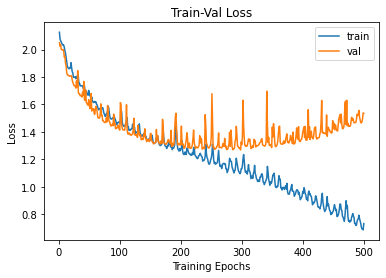

In [45]:
num_epochs=params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

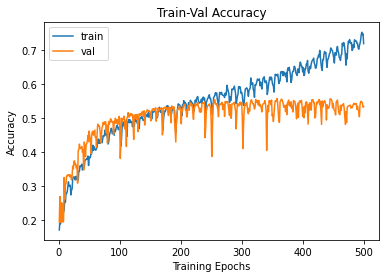

In [46]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()